# HW1(~9/13)
HW1_학번_이름.ipynb 형태로 저장하여 Jupyter Notebook을 그대로 제출! <br>
(예: HW1_2020_12345_keondo.ipynb) <br>
훈련을 진행하고 Output을 지우지 말고 제출할 것!

In [1]:
import tensorflow as tf
from sklearn import model_selection
import matplotlib.pyplot as plt

/Users/liontea/miniconda3/envs/tf2.9.2_p3.10.5/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# check devices
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
# CUDA : 11.4, architecture: x86_64, Distribution: Ubuntu_20.04

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-09-08 17:27:07.987381: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-08 17:27:07.987678: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8771118972616278316
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 locality {
   bus_id: 1
 }
 incarnation: 12799552964695643385
 physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
 xla_global_id: -1]

## Problem 1: CIFAR10 데이터셋을 이용하여 MLP 모델 만들고 훈련시키기
다른 데이터셋을 이용하여 스스로 MLP를 구성하고 훈련해 보자. <br>
10개의 서로 다른 class를 가진 CIFAR10 데이터셋을 이용하여 비슷하게 MLP 모델을 만들고 훈련하여 제출하시오. <br>
모델은 최소한 3개 이상의 Dense layer를 사용하여 구성하여야 하고 0.4 이상의 Validation accuracy를 달성할 때까지 훈련을 진행하시오. 또한 Regularizer를 한번 이상 활용하시오.(Dropout 제외) <br>
*주의*: Fashion MNIST와 CIFAR10은 Input의 shape가 다르므로 이를 잘 고려해야 한다.

In [3]:
cifar10 = tf.keras.datasets.cifar10

#Load datauanme 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split train set into train/valid set 8:2
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train,test_size=0.2)

#Rescale data to be in the range of [0,1]
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

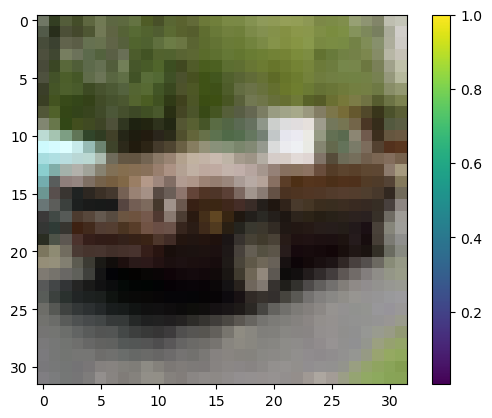

In [4]:
#Let's look at the sample data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

---
여기부터 수강생의 코드를 추가하시오

In [25]:
print(x_train.shape)

(40000, 32, 32, 3)


In [43]:
##################
# 32 -> Flatten (32,32,3) => 3,072
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)), # 3,072 nodes
    tf.keras.layers.Dense(1024, activation = "relu"), # 1024 nodes
    tf.keras.layers.Dense(512, activation = "relu", kernel_regularizer = tf.keras.regularizers.L2(l2=0.01)), # 512 nodes
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation = "relu", kernel_regularizer = tf.keras.regularizers.L2(l2=0.01)), # 256 nodes
    tf.keras.layers.Dense(128, activation = "relu"), # 128 nodes
    tf.keras.layers.Dense(10, activation = "softmax"), # output nodes
])

################### 

In [44]:
# loss fn and optimizer
loss_fn = tf.keras.losses.sparse_categorical_crossentropy
optim_fn = tf.keras.optimizers.Adam(learning_rate=0.001) # commonly 0.001

In [45]:
model.compile(optimizer=optim_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_28 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_29 (Dense)            (None, 512)               524800    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 256)               131328    
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 10)               

In [47]:
hist = model.fit(x_train, y_train, epochs=15, validation_data=(x_valid, y_valid))

Epoch 1/15


2022-09-08 16:46:57.941256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1246/1250 [============================>.] - ETA: 0s - loss: 2.5456 - accuracy: 0.2534

2022-09-08 16:47:08.941158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - 13s 10ms/step - loss: 2.5440 - accuracy: 0.2534 - val_loss: 1.9246 - val_accuracy: 0.2963
Epoch 2/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.8708 - accuracy: 0.3337 - val_loss: 1.8289 - val_accuracy: 0.3458
Epoch 3/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.8073 - accuracy: 0.3571 - val_loss: 1.7709 - val_accuracy: 0.3680
Epoch 4/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.7548 - accuracy: 0.3803 - val_loss: 1.7152 - val_accuracy: 0.3933
Epoch 5/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.7166 - accuracy: 0.3954 - val_loss: 1.7024 - val_accuracy: 0.4013
Epoch 6/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.6857 - accuracy: 0.4098 - val_loss: 1.6831 - val_accuracy: 0.4011
Epoch 7/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.6623 - accuracy: 0.4160 - val_loss: 1.6889 - val_accuracy: 0.

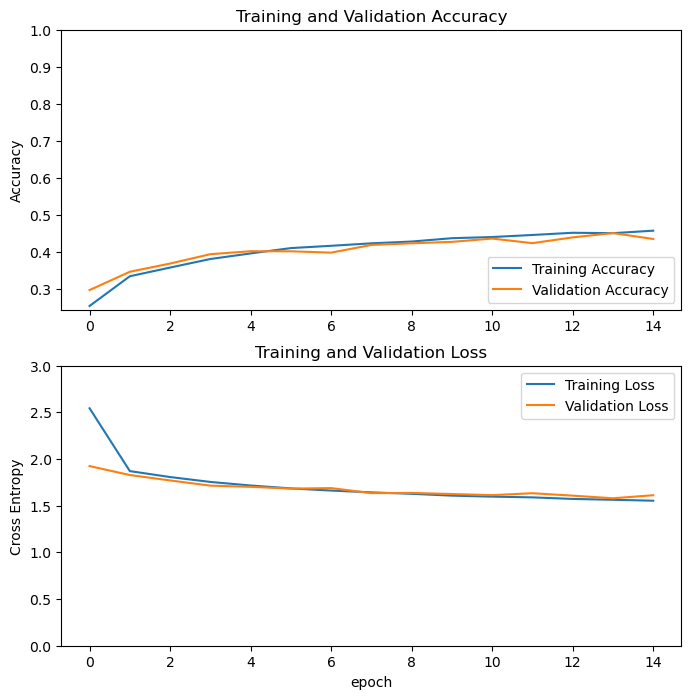

In [48]:
# Get Training accuray & Validation accuracy from history
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# Get Training loss & Validation loss from history
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Let's visualize accuracy
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# Let's visualize loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [49]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 1.5837 - accuracy: 0.4418 - 1s/epoch - 4ms/step


[1.5837498903274536, 0.4418000280857086]

## Problem 2: 간단한 ResNet 구현

다음은 MLP layer만을 간단하게 구현한 ResNet-11 모델의 구조이다. 

`ResBlock`함수를 작성한 다음 `ResNet11`함수를 이용하여 ResNet-11를 구현해보자.
- 조건1: 1번째 ResBlock의 node는 100개, 2,3번째 ResBlock의 node는 200개를 사용한다.
- 조건2: 마지막 Layer의 node 수는 10개이다.
- 조건3: Activation은 모두 ReLU를 사용한다. 단, 마지막 layer에서는 Softmax activation을 사용한다.   
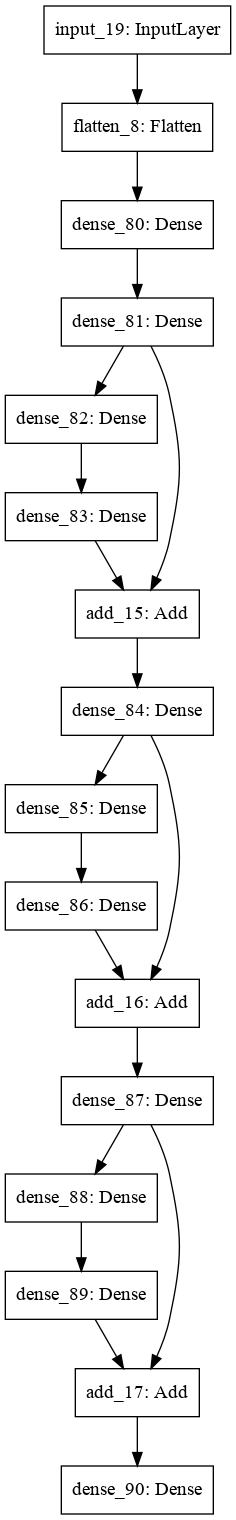


ResNet에 대해서는 다음 문서 참조:(https://openaccess.thecvf.com/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf) 

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Concatenate, Flatten, Add, MaxPooling2D, GlobalAveragePooling2D

In [4]:
# - 조건1: 1번째 ResBlock의 node는 100개, 2,3번째 ResBlock의 node는 200개를 사용한다.
# - 조건2: 마지막 Layer의 node 수는 10개이다.
# - 조건3: Activation은 모두 ReLU를 사용한다. 단, 마지막 layer에서는 Softmax activation을 사용한다. 

def ResBlock(x, nodes=100):
    x = Dense(nodes, activation = "relu")(x) # first dense
    leftone = Dense(nodes, activation = "relu")(x) # left-first dense
    lefttwo = Dense(nodes, activation = "relu")(leftone) # left-seconde dense
    x = Add()([x, lefttwo])

    return x    

In [ ]:
def ResNet11():
    inputs = Input(shape=(224, 224, 3))    
    x = Flatten()(inputs)
    x = Dense(100)(x) # dense_80
    ##################
    x = ResBlock(x, 100)
    x = ResBlock(x, 200)
    x = ResBlock(x, 200)
    ##################
    outputs = Dense(10, activation = "softmax")(x)

    ##################
    return tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
resnet11 = ResNet11()

In [ ]:
tf.keras.utils.plot_model(resnet11, to_file='resnet11.png')